<h1 style="font-size: 200%;color: darkgreen; font-weight: bold; text-align:center">Numerical Simulation Laboratory 2021</h1>

<p style="text-align:center"><b>Author:</b> Giacomo Riccardo Hvaring</p>

---

# 9. The travelling salesman problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the $n$-th city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is a particular permutation $P$ of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
[ 1, 3, 5, 4, 2 ]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{pmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{pmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

<p class="remark">as a starting point use the 1D representation (but you can work with the representation you prefer or the one you are able to invent!)

In [1]:
from libsim import *                        # module containing some handy functions for the labs

results_directory += "lab_09/"              # where to look for the data
HTML(custom_css())   

## Exercise 9.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator with probability to select an individual calculated using $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population, e.g. select the individual $j$ with the algorithm: $j={\rm int}(N\times r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<p class="remark">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</p>

Then you can start introducing some *genetic-mutation* operators, for example:
1. **pair permutation** of cities (except for the first city), e.g. $[ 1, 2, 3, 4, 5 ] \to [ 1, 2, \mathbf4, \mathbf3, 5 ]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. **shift** of $+n$ positions for $m\lt N-1$ contiguous cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. **permutation among $m$ contiguous cities** (except for the first city) with other (different!) $m<N/2$ contiguous cities, e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. **inversion of the order** in which they appear in the path of $m \le N$ cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, \mathbf4, \mathbf3, \mathbf2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before including a crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ can be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bods and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
[ 1, 2, 3, 4, 5 ]\\
[ 1, 5, 4, 3, 2 ]
$$
1. cut their paths at the same position:
$$
[ 1, 2, 3 | 4, 5 ]\\
[ 1, 5, 4 | 3, 2 ] 
$$
2. conserve the first part of the paths:
$$
[ 1, 2, 3 | X, Y ]\\
[ 1, 5, 4 | X, Y ] 
$$

3. complete the paths with the missing cities adding them **in the order** in which they appear in the consort:
$$
[ 1, 2, 3 | 5, 4 ]\\
[ 1, 5, 4 | 2, 3 ]
$$

now repeat...many times!

<p class="assignement">Apply your code to the optimization of a path among 32 cities randomly placed <b>on a circumference</b>, then also <b>inside a square</b>, and plot $L^{(2)}$ (or $L^{(1)}$) of the best path and its average on the best half of the population, as functions of the iterations/generations of your algorithm. Show also the best path found with the algorithm.</p>

### my solution

In solving this task I decided to use the following strategy:

1. **Reproduction:** After proposing two randomly selected elements of the population as "parents", I created two new "children" with the above-described procedure

2. **Mutation:** These children then underwent two mutations (each with a $10\%$ probability) consisting in a random **permutation** of a sub-portion of the route, and a random **inversion** of the order of a sub-portion of the route 

3. **Selection:** Lastly, I retained only the fittest parent and the fittest child, eliminating the ones with the longer path

In [2]:
from ipywidgets import interactive

title = 'Sum of squared distances along the shortest path'
xlabel = 'generation'
ylabel = '$L^{(2)}$'
generations = 1000

def plot_lengths(ax, generation, shape):
    lengths = np.loadtxt(results_directory + 'lengths_' + shape + '.dat')
    best_average = np.loadtxt(results_directory + 'best_average_' + shape + '.dat')
    L_best = lengths[generation]
    L_best_avg = best_average[generation]
    if shape == 'circle':
        label_L = f'${L_best_avg:.4f}$'
        label_best = f'${L_best:.4f}$'
    else:
        label_L = f'${L_best_avg:.2f}\; L_{{\\rm square}}$'
        label_best = f'${L_best:.2f}\; L_{{\\rm square}}$'
    ax.plot(best_average[:generation], label=f'best half average: ' + label_L)
    ax.plot(lengths[:generation], label=f'shortest path: ' + label_best)
    set_labels(ax, title, xlabel, ylabel)
    ax.legend(loc='center')
    
N = 32
color = 'darkred'    
color_w = 'darkgreen'
color_m = 'k'

def draw_solution(ax, generation, shape, f_best, f_worst):
    points = np.loadtxt(results_directory + shape + '_points.dat')
    x, y = points[:,0], points[:,1]
    if shape == 'circle':
        xlim = [-1.05, 1.05]
        ylim = [-1.05, 1.05]
    elif shape == 'square':
        xlim = [-0.01, 1.01]
        ylim = [-0.01, 1.01]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.scatter(x, y, lw=0.1, c=color_m)
    ax.set_axis_off()
    best_routes = np.loadtxt(results_directory + 'best_routes_' + shape + '.dat', dtype=int)
    worst_routes = np.loadtxt(results_directory + 'worst_routes_' + shape + '.dat', dtype=int)
    best = best_routes[generation]
    worst = worst_routes[generation]
    for i in range(0,N):
        if f_best:
            x1, x2, y1, y2 = x[best[i]], x[best[i-1]], y[best[i]], y[best[i-1]]
            ax.plot([x1, x2], [y1, y2], c=color, alpha=0.2)
        if f_worst:
            x1, x2, y1, y2 = x[worst[i]], x[worst[i-1]], y[worst[i]], y[worst[i-1]]
            ax.plot([x1, x2], [y1, y2], c=color_w, alpha=0.2)

def plot_solution(generation, shape, best=True, worst=False):
    fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'width_ratios': [1.3, 1]})
    plot_lengths(ax[0], generation, shape)
    draw_solution(ax[1], generation, shape, best, worst)
    
#interactive(plot_solution, shape=['circle', 'square'], generation=(0, generations-1)) # <- interactive plot

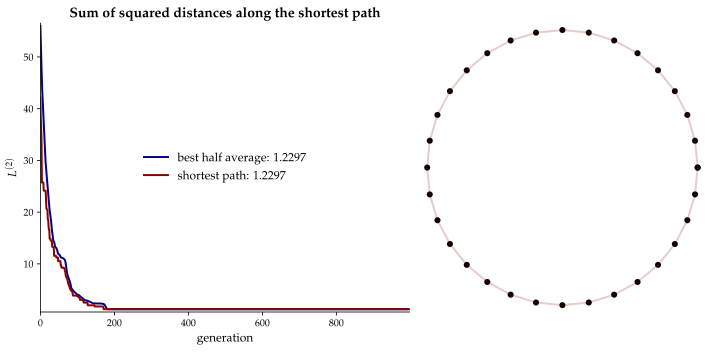

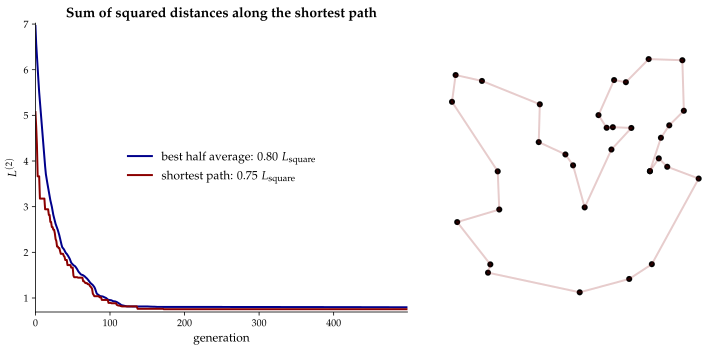

In [7]:
plot_solution(-1, 'circle', best=True, worst=False)
plot_solution(500, 'square', best=True, worst=False)

<p class='remark'>Since the "metric" I used was $L^{(2)}$, the length of the path is not the <i>usual</i> euclidian length, but in general it is shorter. In fact it tends to zero for very large $N$.</p>

For the circumcerence one can show that
$$L^{(2)}_N \approx \frac{(2\pi)^2}{N}$$
right below I estimate (and calculate exactly) $L^{(2)}$ in the $N=32$ case.

In [4]:
L = 0
N = 32
dtheta = 2*np.pi/N
for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
    L += (np.cos(theta) - np.cos(theta + dtheta))**2 + (np.sin(theta) - np.sin(theta + dtheta))**2
print("actual shortest path: ", round(L, 4))
print("approximation (better for larger N):", round((2*np.pi)**2/N, 4))

actual shortest path:  1.2297
approximation (better for larger N): 1.2337
